Enabling GPU and testing GPU

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

device_list= tf.test.gpu_device_name()
device_list

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16400926308222277253
 xla_global_id: -1]

In [2]:
import statistics 
import csv
import numpy as np
import seaborn as sns
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot


In [3]:
from google.colab import drive
drive.mount('/content/drive')
new_diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Csv file/Z score deviation outlier removal method dataframe.csv')


Mounted at /content/drive


In [4]:
new_diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.226231,0.604490,0.592999,0.209978,0.085706,0.480017,0.187833,0.201575,0.329942
std,0.192897,0.150783,0.100925,0.155610,0.106509,0.098642,0.117573,0.190617,0.470534
min,0.000000,0.221106,0.196721,0.000000,0.000000,0.271237,0.032231,0.000000,0.000000
25%,0.058824,0.497487,0.524590,0.000000,0.000000,0.408346,0.101240,0.050000,0.000000
50%,0.176471,0.577889,0.590164,0.232323,0.051418,0.476900,0.152893,0.133333,0.000000
75%,0.352941,0.698492,0.655738,0.323232,0.148936,0.540984,0.250207,0.316667,1.000000
max,0.764706,1.000000,1.000000,0.606061,0.490544,0.819672,0.603719,0.783333,1.000000


In [5]:
X = new_diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = new_diabetes_dataset['Outcome']


In [6]:
features=X.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.083058,0.150000


In [8]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [9]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.65735547  0.92404008 -0.02811548 ...  0.21028523  0.60651604
   1.47921983]
 [-0.86848989 -1.17708222 -0.51576542 ... -0.84806325 -0.36422044
  -0.18326505]
 [ 1.26769361  2.09133025 -0.67831541 ... -1.34699896  0.76478828
  -0.09576585]
 ...
 [ 0.3521864   0.0235591  -0.02811548 ... -0.90854031 -0.73703953
  -0.27076425]
 [-0.86848989  0.19031483 -1.00341537 ... -0.31888901 -0.37125476
   1.21672222]
 [-0.86848989 -0.91027304 -0.19066546 ... -0.27353122 -0.49083824
  -0.88325868]]


In [10]:
X = standardized_data 
Y = new_diabetes_dataset['Outcome']

In [11]:
print(X,Y)

[[ 0.65735547  0.92404008 -0.02811548 ...  0.21028523  0.60651604
   1.47921983]
 [-0.86848989 -1.17708222 -0.51576542 ... -0.84806325 -0.36422044
  -0.18326505]
 [ 1.26769361  2.09133025 -0.67831541 ... -1.34699896  0.76478828
  -0.09576585]
 ...
 [ 0.3521864   0.0235591  -0.02811548 ... -0.90854031 -0.73703953
  -0.27076425]
 [-0.86848989  0.19031483 -1.00341537 ... -0.31888901 -0.37125476
   1.21672222]
 [-0.86848989 -0.91027304 -0.19066546 ... -0.27353122 -0.49083824
  -0.88325868]] 0      1
1      0
2      1
3      0
4      0
      ..
683    0
684    0
685    0
686    1
687    0
Name: Outcome, Length: 688, dtype: int64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=42)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(688, 8) (550, 8) (138, 8)


## Training with K nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

Model Evaluation and Accuracy Score

In [15]:
# accuracy score on the training data
X_train_prediction =model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)


print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8090909090909091
Accuracy score of the test data :  0.782608695652174


Confusion Matrix

showing Confusion Matrix 
 [[81 11]
 [19 27]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  19
Diabetes Detected (True Positives):  27
Total Diabetes:  46
Sensitivity:  0.5869565217391305
Specificity:  0.8804347826086957


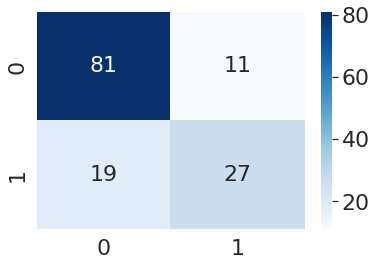

In [16]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Patient with Not Diabetes Correctly Detected (True Negatives): ',cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 22}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

Roc Curve of KNN


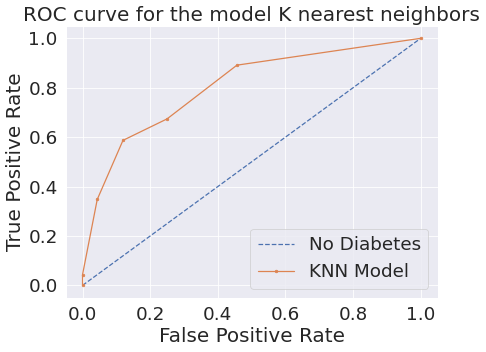

In [17]:
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='KNN Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model K nearest neighbors')
pyplot.legend()
pyplot.show()

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.11956522 1.        ] [0.         0.58695652 1.        ] [2 1 0] 

0.733695652173913


# Hyperparameter_Tuning for KNN

In [19]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model_knn =  KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10,13,15],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'metric' : ['minkowski','euclidean','manhattan'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets


grid_search = GridSearchCV(
    model_knn, 
    param_grid=params, 
   # cv=5,
    scoring='accuracy',
    n_jobs=-1, refit = True,verbose = 3) 

#model_rfc.fit(X_train, Y_train)


grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_) 


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Params:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 13, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=13)
Best Score:  0.7636363636363637


## Accuracy score after hyperparameter tuning in KNN

In [20]:
#training the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, metric = 'minkowski', n_jobs = -1, n_neighbors = 13, weights = 'uniform')
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_knn = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT 
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))


 Accuracy score of the training data :  0.7763636363636364 

Accuracy score of the test data :  0.7608695652173914 

              precision    recall  f1-score   support

           0    0.78641   0.88043   0.83077        92
           1    0.68571   0.52174   0.59259        46

    accuracy                        0.76087       138
   macro avg    0.73606   0.70109   0.71168       138
weighted avg    0.75284   0.76087   0.75138       138



Ploting Confusion Marix for KNN

showing Confusion Matrix 
 [[81 11]
 [22 24]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  22
Diabetes Detected (True Positives):  24
Total Diabetes:  46
Sensitivity:  0.5217391304347826
Specificity:  0.8804347826086957


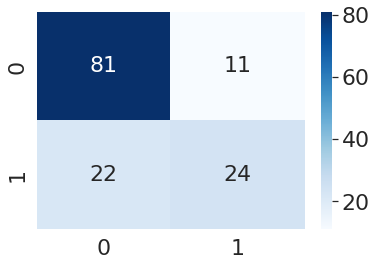

In [21]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")
#ploting Confusion Matrix
y_true = ["0","1"]
data = cm
print('Patient with Not Diabetes Correctly Detected (True Negatives): ',cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 22}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

ROC Curve of GNB

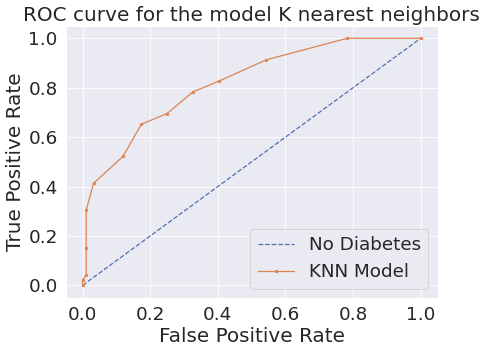

In [22]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='KNN Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model K nearest neighbors')
pyplot.legend()
pyplot.show()

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)


[0.         0.11956522 1.        ] [0.         0.52173913 1.        ] [2 1 0] 

0.7010869565217391


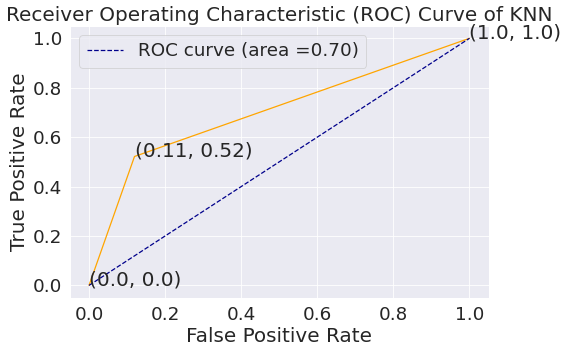

In [24]:
#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)
#auc_svm = auc(fpr,tpr)
plt.figure(figsize=(9, 6), dpi=60)
plt.plot(fpr, tpr, color='orange',)
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area =%0.2f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
for xy in zip(fpr,tpr):
  plt.annotate('(%.4s, %.4s)' % xy, xy=xy)
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend()
plt.show()

## Cross Validation Score (Precision-Recall Curve)  

In [25]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [26]:
scoring = {'prec_macro': 'precision_macro','rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(classifier, X, Y, scoring=scoring, cv=5, return_train_score=True)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_macro',
 'train_prec_macro',
 'train_rec_macro']

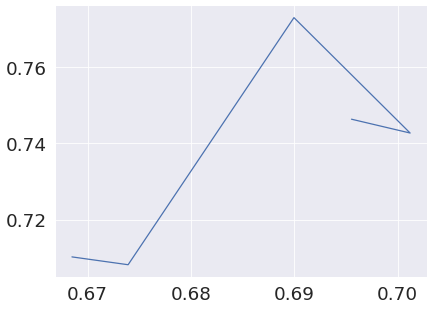

In [27]:
k = scores['test_rec_macro']
m = scores['test_prec_macro']

pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot(k,m)

In [28]:
print('test_rec_macro : ', k)
print('test_prec_macro : ', m)

test_rec_macro :  [0.66847826 0.67391304 0.68996416 0.70120773 0.6955314 ]
test_prec_macro :  [0.71020047 0.7081448  0.77300824 0.74271562 0.74634814]


## Model explainability With Explainable AI 

SHAP

In [29]:
#Load ML interpreting  models 
!pip install shap 
import shap

#initialize JS for plot 
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 8.6 MB/s 


  0%|          | 0/138 [00:00<?, ?it/s]

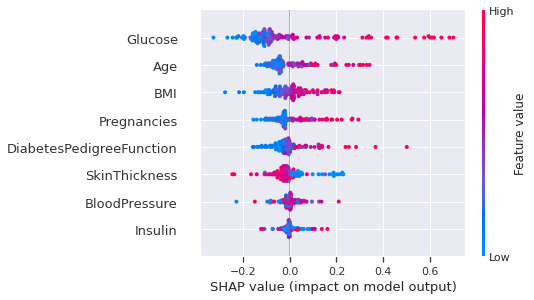

In [30]:
shap_explainer = shap.KernelExplainer(classifier.predict,X_test)
shap_values = shap_explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features, title="SHAP summary plot") 

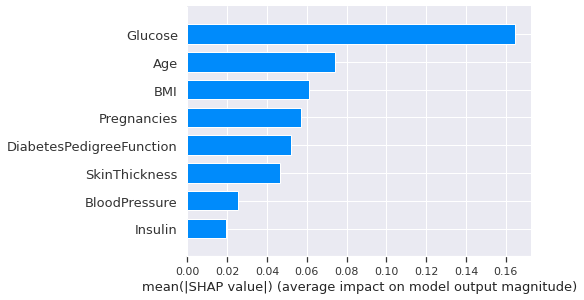

In [31]:
shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")

In [32]:
shap.initjs()
i = 18
shap.force_plot(shap_explainer.expected_value, shap_values[i], X_test[i], feature_names = features, show=True )


From colab notebook to pdf

In [33]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

#Mount your google drive to get access to your ipynb files

from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Colab Notebooks/XAI with Hyperparameter_tuning KNN_new.ipynb" ./
#Then you can run the converter.

!jupyter nbconvert --to PDF "XAI with Hyperparameter_tuning KNN_new.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain